In [1]:
from data_utils import ModisFeatureExtractor
# the Histogram Extractor was never finished 
#from data_utils import ModisHistogramExtractor

In [2]:
from modis_model_util import *

In [3]:
# I can use a funciton call get dates to pull the dates corresponding with my Modis images 
dates = get_dates('afg_dates.txt')

In [4]:
# The feature extractor just grabs the veg indices from the modis images
# the important arguments are the first two, which include which directory the images are stored in and the
# number of bands the image contains (the other two are vestigial hold over from other ideas)
# this code takes a few minutes to run so I just ended up making pickled dfs with the info
# feel free to uncomment it below and see it function 
feature_data = ModisFeatureExtractor('afg_full_time', 7, True, False)


LOADING  1_99879.tif
afg_full_time/1_99879.tif
LOAD DONE
Divide Image
Processed 190 Images
1_99879.tif
['1', '99879', 'tif']
LOADING  1_99878.tif
afg_full_time/1_99878.tif
LOAD DONE
Divide Image
Processed 190 Images
1_99878.tif
['1', '99878', 'tif']
LOADING  1_299.tif
afg_full_time/1_299.tif
LOAD DONE
Divide Image
Processed 190 Images
1_299.tif
['1', '299', 'tif']
LOADING  1_272.tif
afg_full_time/1_272.tif
LOAD DONE
Divide Image
Processed 190 Images
1_272.tif
['1', '272', 'tif']
LOADING  1_273.tif
afg_full_time/1_273.tif
LOAD DONE
Divide Image
Processed 190 Images
1_273.tif
['1', '273', 'tif']
LOADING  1_298.tif
afg_full_time/1_298.tif
LOAD DONE
Divide Image
Processed 190 Images
1_298.tif
['1', '298', 'tif']
LOADING  1_303.tif
afg_full_time/1_303.tif
LOAD DONE
Divide Image
Processed 190 Images
1_303.tif
['1', '303', 'tif']
LOADING  1_288.tif
afg_full_time/1_288.tif
LOAD DONE
Divide Image
Processed 190 Images
1_288.tif
['1', '288', 'tif']
LOADING  1_277.tif
afg_full_time/1_277.tif
LOAD 

In [5]:
# when looking over the plots of the afghanistan ndvi across dates I noticed that they appeared to be ~ 3 months 
# off of the Artemis data set so the commented out code just realigns the images with the correct date 
# this has already been fixed in the pickles, but if you start cold run this 
#AFGHANISTAN DATE ADJUSTMENT
tempt_df = pd.DataFrame(dates, columns=['d'])
tempt_df = pd.to_datetime(tempt_df['d'], format='%Y-%m-%d', utc=True)
display(tempt_df[0])
tempt_df +=  pd.DateOffset(months=3)
display(tempt_df[0].month)
new_dates = []
for d in tempt_df:
    new_dates.append('{}-{}-{}'.format(d.year, '{:02}'.format(d.month), '{:02}'.format(d.day)))
print(new_dates[0])
dates = new_dates

Timestamp('2013-02-02 00:00:00+0000', tz='UTC')

5

2013-05-02


In [6]:
# if you are running this for the first time trying to grab information from the modis image, this pairs 
#the dates of the image with the index info 
# this information has already been pulled and pickled for your convenience 
feature_info = feature_data.get_data()


if len(feature_info[0][1]) != len(dates):
    print (len(feature_data.get_data()[0][1]))
    print('issue in command zone')
afg_df = pd.DataFrame(columns=dates)
for i in range(0, len(feature_info)):
    s = (feature_info[i][1])
    name = feature_info[i][0]
    afg_df.loc[name] = s
afg_df = afg_df.sort_index()
afg_df = afg_df.set_index(afg_df.reset_index().index.values)

print('Here is what the 1st round processed dataframe for Afghanistan Looks like.')
print('It will require another round of processing before use.')
display(afg_df)
#afg_df.to_pickle('feature_index_afg_pickle')


Here is what the 1st round processed dataframe for Afghanistan Looks like.
It will require another round of processing before use.


,2013-05-02,2013-05-10,2013-05-18,2013-05-26,2013-06-06,2013-06-14,2013-06-22,2013-06-30,2013-07-07,2013-07-15,...,2017-04-09,2017-04-17,2017-04-25,2017-05-02,2017-05-10,2017-05-18,2017-05-26,2017-06-06,2017-06-14,2017-06-22
0,"[7737.990400355508, 7377.2720458533795, 7760.6...","[6616.964036475928, 6315.559518249301, 6519.66...","[6153.486208163099, 5946.17274372078, 6191.729...","[6881.665812659559, 6511.468042751747, 6574.77...","[5645.593627142009, 5403.913689356048, 5365.54...","[5874.640070013467, 5587.1771649080165, 5713.5...","[5503.318865092573, 5234.88307206762, 5148.620...","[5200.446798380259, 5048.42990264319, 4839.452...","[4842.216878505775, 4692.043427395037, 4393.94...","[4944.6456747185175, 4827.008724476146, 4434.3...",...,"[6486.779988119476, 6206.7308607938185, 6587.3...","[6491.183000875169, 6230.581401992482, 6531.08...","[6794.873204884619, 6564.5024010447605, 6777.3...","[7470.566855152837, 7208.5853787937185, 7505.4...","[6481.121294705004, 6162.032222519487, 6388.68...","[7043.807072992668, 6760.312371615524, 7033.53...","[6727.55364147119, 6465.357100426701, 6555.854...","[7186.627155612187, 6952.909082252221, 7030.41...","[6285.262922336745, 6023.478671739318, 6055.01...","[6928.606478059575, 6523.481900339638, 6687.51..."
1,"[3035.7238063497975, 3544.3504641292307, 2656....","[2318.0294356933514, 3004.001039022143, 1918.2...","[2241.3466707181997, 3046.7779041159, 1641.556...","[2279.206755604348, 3140.6345386643666, 1760.7...","[1864.735264999657, 2921.340456189533, 1247.99...","[1745.1339750438644, 2918.9294053068547, 1008....","[1220.6162381517167, 2509.783020809849, 642.74...","[1491.050088708966, 3032.6402532861525, 767.32...","[1506.2130191434928, 3016.2027269430205, 771.2...","[1332.2151461982571, 2686.8859232103823, 644.8...",...,"[2703.4045324890462, 3162.3771846420764, 2002....","[2743.1510012840745, 3196.767631519619, 2084.9...","[5152.211744871053, 5269.6481831815645, 5016.2...","[4516.379027436066, 4695.305825385467, 4254.96...","[4598.76451445319, 4808.307129064194, 4346.707...","[4257.109067918721, 4486.835707074172, 4035.76...","[2246.7524676775893, 2923.539242690087, 1542.9...","[2605.0207804428587, 3355.1696350679777, 1964....","[2146.9603211166545, 2984.885119438536, 1283.6...","[1776.6419196424195, 2728.2919750242604, 1258...."
2,"[4208.529966080374, 4261.611901071501, 4159.16...","[3559.7248242244536, 3867.406575016286, 3099.0...","[3086.1630725340883, 3462.892400655929, 2754.5...","[4032.2818136891524, 4286.467079991913, 3617.1...","[2770.7006536828626, 3151.8575937282385, 2311....","[2716.5542938652648, 3231.082002381113, 2211.9...","[2895.052575420626, 3532.325415009996, 2228.44...","[2661.022227463666, 3339.523451715075, 2052.68...","[2441.7924051485948, 3171.251117550599, 1829.5...","[2532.232899791091, 3360.97046072287, 1939.651...",...,"[3263.3504054630816, 3437.2975941775053, 2948....","[3226.2560707145585, 3483.336500662668, 2958.3...","[3835.306455960644, 4000.2503088707685, 3889.9...","[5980.633870206887, 5890.4660916054545, 5874.6...","[3540.2349102590024, 3699.2246782128177, 3207....","[3628.309510973336, 3950.580778129703, 3162.31...","[3018.848743176764, 3390.3590089179415, 2446.1...","[4936.857178156659, 5285.763202821394, 4597.24...","[3372.088572904733, 3776.7190623806637, 2773.3...","[3176.0006626681943, 3672.332850371768, 2562.5..."
3,"[1866.5107083048329, 2436.0437059225887, 1096....","[2103.5975776587966, 2790.1947189659645, 1203....","[1926.321131212114, 2621.0954902469516, 1127.8...","[2134.472651366842, 2872.5916102554424, 1231.8...","[1974.455527513739, 2704.376901667571, 1222.00...","[2078.9571549873813, 3002.299938674906, 1114.9...","[1798.0689199707526, 2727.9636412953746, 947.2...","[1941.679812250867, 2940.523916786565, 994.190...","[1997.7532726372149, 3029.8825388588816, 1039....","[2018.4162086940114, 3008.9316107271743, 1056....",...,"[2083.438521593509, 2593.3381017524825, 1191.1...","[2371.709472368328, 2966.693115078897, 1391.21...","[3056.

In [7]:
# extract the modis data pickles 
mali_df = pd.read_pickle('feature_index_mali_int_pickle')
mali_df = mali_df.sort_index()
somalia_df = pd.read_pickle('feature_index_somalia_int_pickle')
somalia_df = somalia_df.sort_index()
afg_df = pd.read_pickle('feature_index_afg_pickle')
afg_df = afg_df.sort_index()
niger_df = pd.read_pickle('feature_index_niger_int_pickle')
niger_df = niger_df.sort_index()
southsudan_df = pd.read_pickle('feature_index_southsudan_int_pickle')
southsudan_df = southsudan_df.sort_index()

In [8]:
# Extract the Artemis data into a data frame
afg_bframe = pd.read_csv('../acled_visualization/afghanistan.csv')
mali_bframe = pd.read_csv('../acled_visualization/mali.csv')
niger_bframe = pd.read_csv('../acled_visualization/niger.csv')
somalia_bframe = pd.read_csv('../acled_visualization/somalia.csv')
southsudan_bframe = pd.read_csv('../acled_visualization/southsudan.csv')

#There were some issues with pulling image data so in some cases a county needed to be dropped from 
# the modis data, this re-aligns the Artemis data
mali_bframe = mali_bframe.drop(mali_bframe.index[[1,3]])
display(len(mali_bframe.index.values))
display(len(mali_df.index.values))

display(len(somalia_bframe.index.values))
display(len(somalia_df.index.values))

display(len(afg_bframe.index.values))
display(len(afg_df.index.values))

niger_bframe = niger_bframe.drop(niger_bframe.index[[13]])
display(len(niger_bframe.index.values))
display(len(niger_df.index.values))
#with pd.option_context('display.max_rows', None, 'display.max_columns', 10):
    #display((niger_bframe))
#there is no 0,23,32,50,57,58,63,

"""with pd.option_context('display.max_rows', None, 'display.max_columns', 10):
    display((southsudan_bframe))
    display(southsudan_df.index.values)"""
southsudan_bframe = southsudan_bframe.drop(southsudan_bframe.index[[18]])
display(len(southsudan_bframe.index.values))
display(len(southsudan_df.index.values))
#display(afg_df)

47

47

73

73

34

34

60

60

77

77

In [9]:
# align artemis data indices to merge properly with modis data
mali_bframe = mali_bframe.set_index(mali_bframe.reset_index().index.values)
somalia_bframe = somalia_bframe.set_index(somalia_bframe.reset_index().index.values)
niger_bframe = niger_bframe.set_index(niger_bframe.reset_index().index.values)
afg_bframe = afg_bframe.set_index(afg_bframe.reset_index().index.values)
southsudan_bframe = southsudan_bframe.set_index(southsudan_bframe.reset_index().index.values)

In [10]:
# align modis data indices to merge properly with artemis data
somalia_df = somalia_df.set_index(somalia_df.reset_index().index.values)
afg_df = afg_df.set_index(afg_df.reset_index().index.values)
niger_df = niger_df.set_index(niger_df.reset_index().index.values)
southsudan_df = southsudan_df.set_index(southsudan_df.reset_index().index.values)
mali_df = mali_df.set_index(mali_df.reset_index().index.values)

In [11]:
mali_df3 = format_feature_df(mali_df)
somalia_df3 = format_feature_df(somalia_df)
afg_df3 = format_feature_df(afg_df)
niger_df3 = format_feature_df(niger_df)
southsudan_df3 = format_feature_df(southsudan_df)

In [12]:
print('Sample of feature table (before aggregated into months)\n')
with pd.option_context('display.max_rows', 10, 'display.max_columns', 16):
    display(afg_df3)

Sample of feature table (before aggregated into months)



fR_2013-05-02  fNIR_2013-05-02  fB_2013-05-02  fG_2013-05-02  \
0     7737.990400      7377.272046    7760.634932    7889.194958   
1     3035.723806      3544.350464    2656.876405    2964.191504   
2     4208.529966      4261.611901    4159.162286    4248.285632   
3     1866.510708      2436.043706    1096.383801    1605.235406   
4     6982.283314      6702.376251    7139.248290    7068.773379   
..            ...              ...            ...            ...   
29    2571.600273      2958.329723    1900.082009    2309.271517   
30    8167.123277      7661.534883    8241.612594    8358.372147   
31    2492.613027      2695.469233    1887.962665    2305.347596   
32    4502.525390      4454.492800    4291.588274    4455.945302   
33    6580.575580      6170.162372    6815.534350    6756.706286   

    fSR_2013-05-02  fNDVI_2013-05-02  fGNVDI_2013-05-02  fTVI_2013-05-02  \
0         0.953383         -0.023865          -0.033533    -15594.918945   
1         1.167547          0.077298           0.089138     27656.307355   
2         1.012613          0.006267           0.001566      4775.142754   
3         1.305132          0.132371           0.205581     23720.967757   
4         0.959912         -0.020454          -0.026606    -13334.821148   
..             ...               ...                ...              ...   
29        1.150385          0.069934           0.123217     12710.616774   
30        0.938095         -0.031941          -0.043498    -22685.348828   
31        1.081383          0.039100           0.078012      4680.755116   
32        0.989332         -0.005363          -0.000163     -4745.158930   
33        0.937633         -0.032187          -0.045374    -17579.564316   

    fSAVI_2013-05-02  fOSAVI_2013-05-02  fNLI_2013-05-02  fRVDI_2013-05-02  \
0          -0.035793           0.000063         0.999716         -2.934002   
1           0.115921           0.000177         0.999517          6.270234   
2           0.009399           0.000119         0.999537          0.576768   
3           0.198487           0.000302         0.999371          8.682718   
4          -0.030678           0.000070         0.999689         -2.392747   
..               ...                ...              ...               ...   
29          0.104872           0.000207         0.999412          5.200528   
30         -0.047907           0.000059         0.999722         -4.018602   
31          0.058634           0.000208         0.999314          2.816339   
32         -0.008043           0.000110         0.999546         -0.507521   
33         -0.048275           0.000073         0.999654         -3.634575   

    fCARI_2013-05-02  fPSRI_2013-05-02  fR_2013-05-10  fNIR_2013-05-10  \
0        5614.904823         -0.003069    6616.964036      6315.559518   
1        2115.921082          0.106888    2318.029436      3004.001039   
2        8113.437083          0.011584    3559.724824      3867.406575   
3        1305.467096          0.316138    2103.597578      2790.194719   
4        6269.329684         -0.023419    6883.336262      6576.222087   
..               ...               ...            ...              ...   
29       2159.153694          0.226992    2691.258184      3236.688579   
30       4301.448801         -0.009723    7400.680502      6922.735966   
31       3189.132537          0.224321    2459.498139      2881.017449   
32       8404.504569          0.047354    4019.368237      4053.271738   
33       4187.154002         -0.038080    6578.723394      6220.939057   

    fB_2013-05-10  fG_2013-05-10  fSR_2013-05-10  fNDVI_2013-05-10  \
0     6519.668747    6721.979663        0.954450         -0.023306   
1     1918.243082    2218.369255        1.295929          0.128893   
2     3099.095301    3476.273806        1.086434          0.041427   
3     1203.987558    1801.648395        1.326392          0.140300   
4     6699.232638    6927.933017        0.955383         -0.022818   
..            ...           

Run NDVI comparisons between FAM data set and Data set pulled from MODIS

Somalia RSME:  0.039373408518071314
Mali RSME:  0.03579566284005544
Niger RSME:  0.009648062809449545
South Sudan RSME:  0.05020319174138517
Afg RSME:  0.03169367194109766


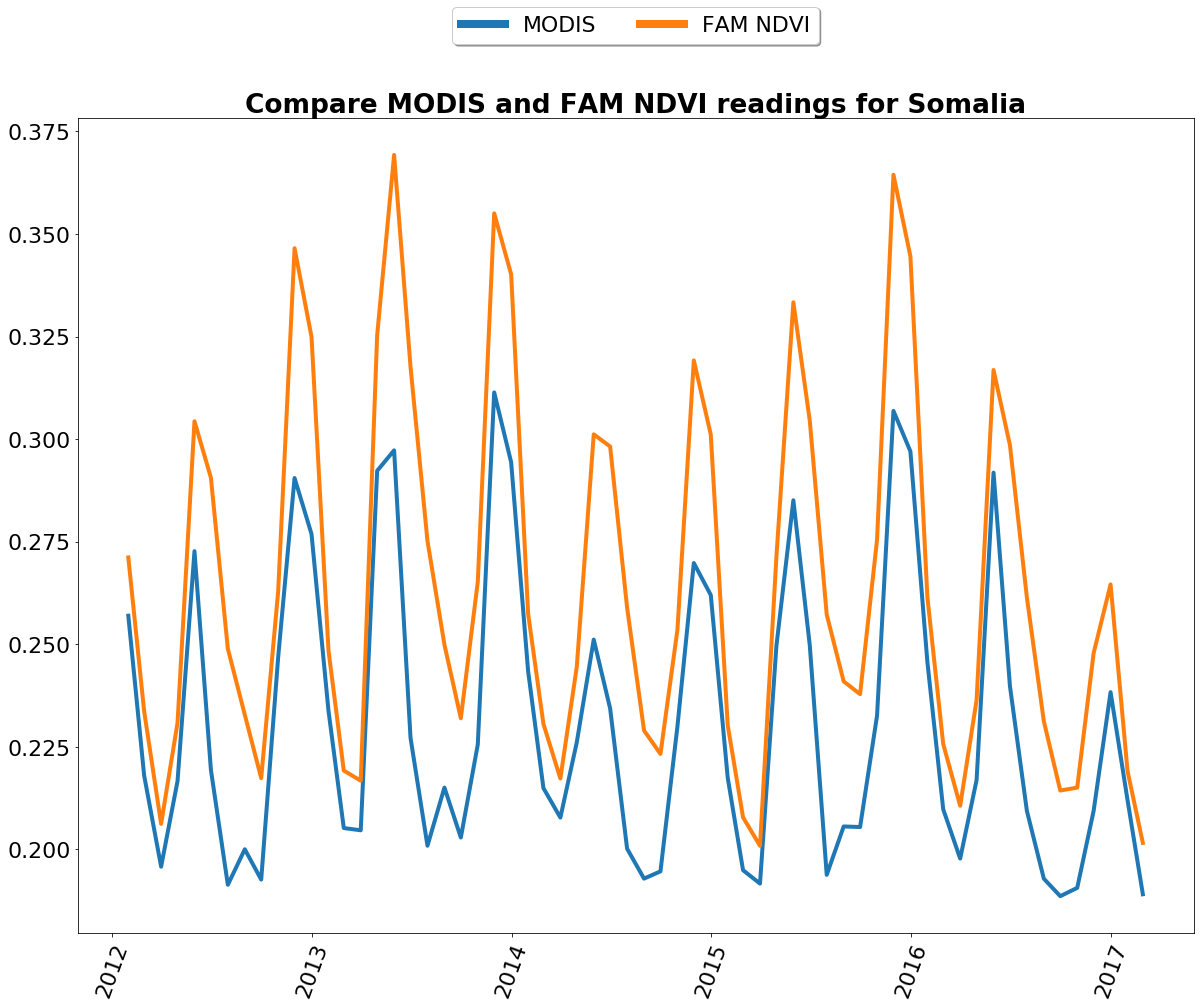

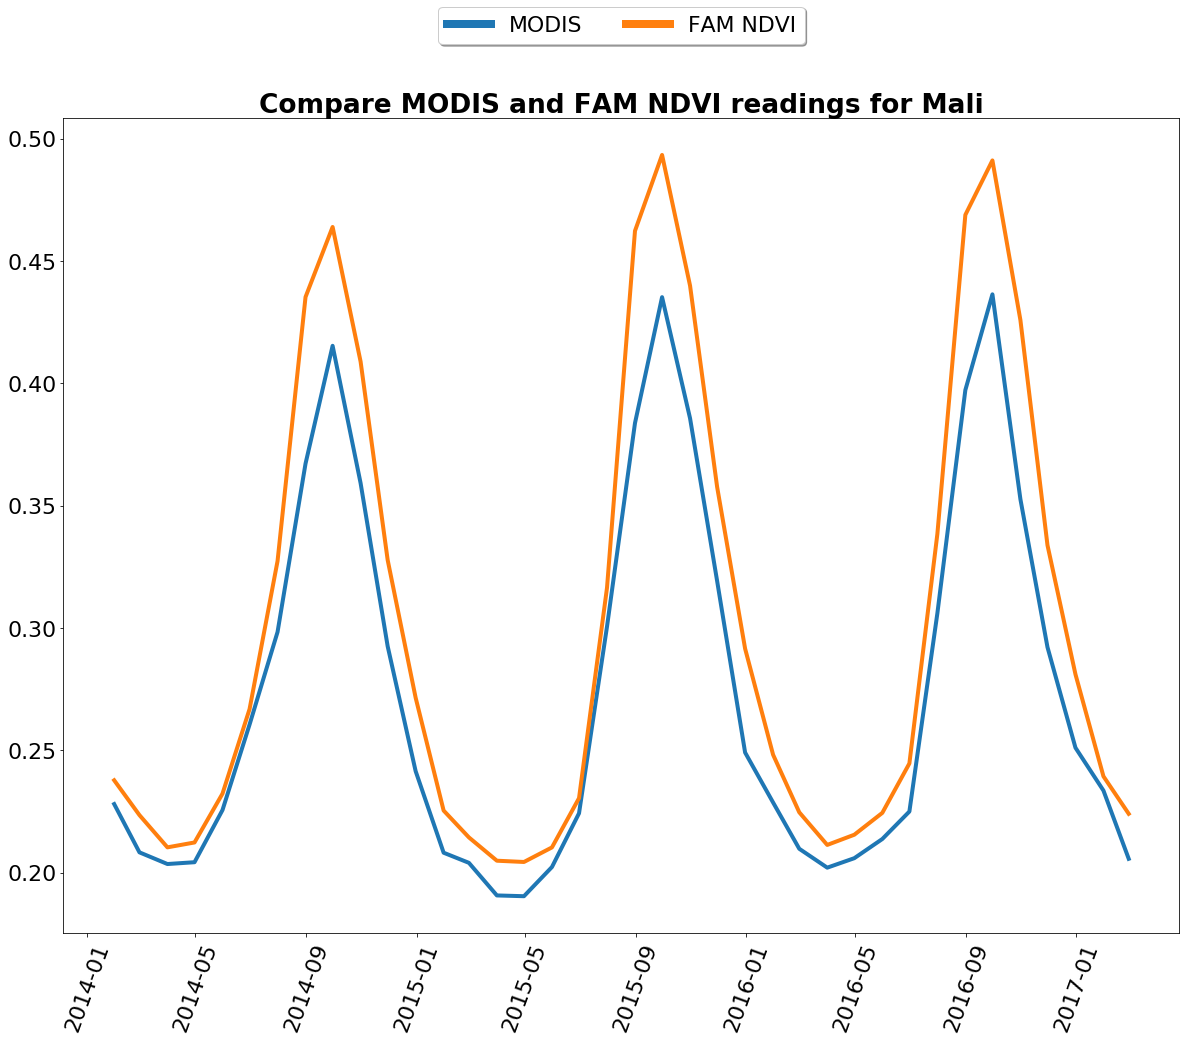

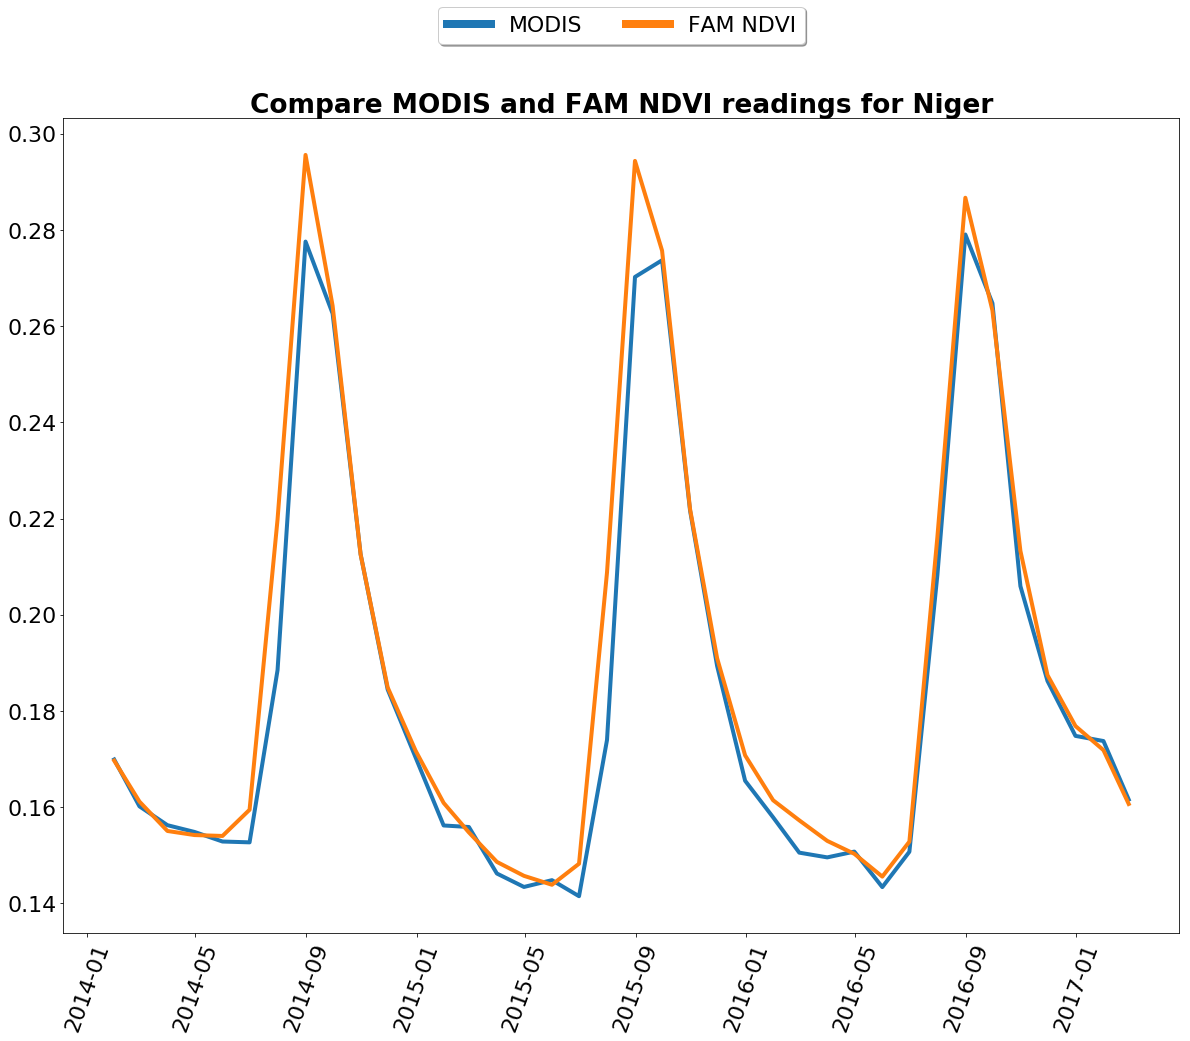

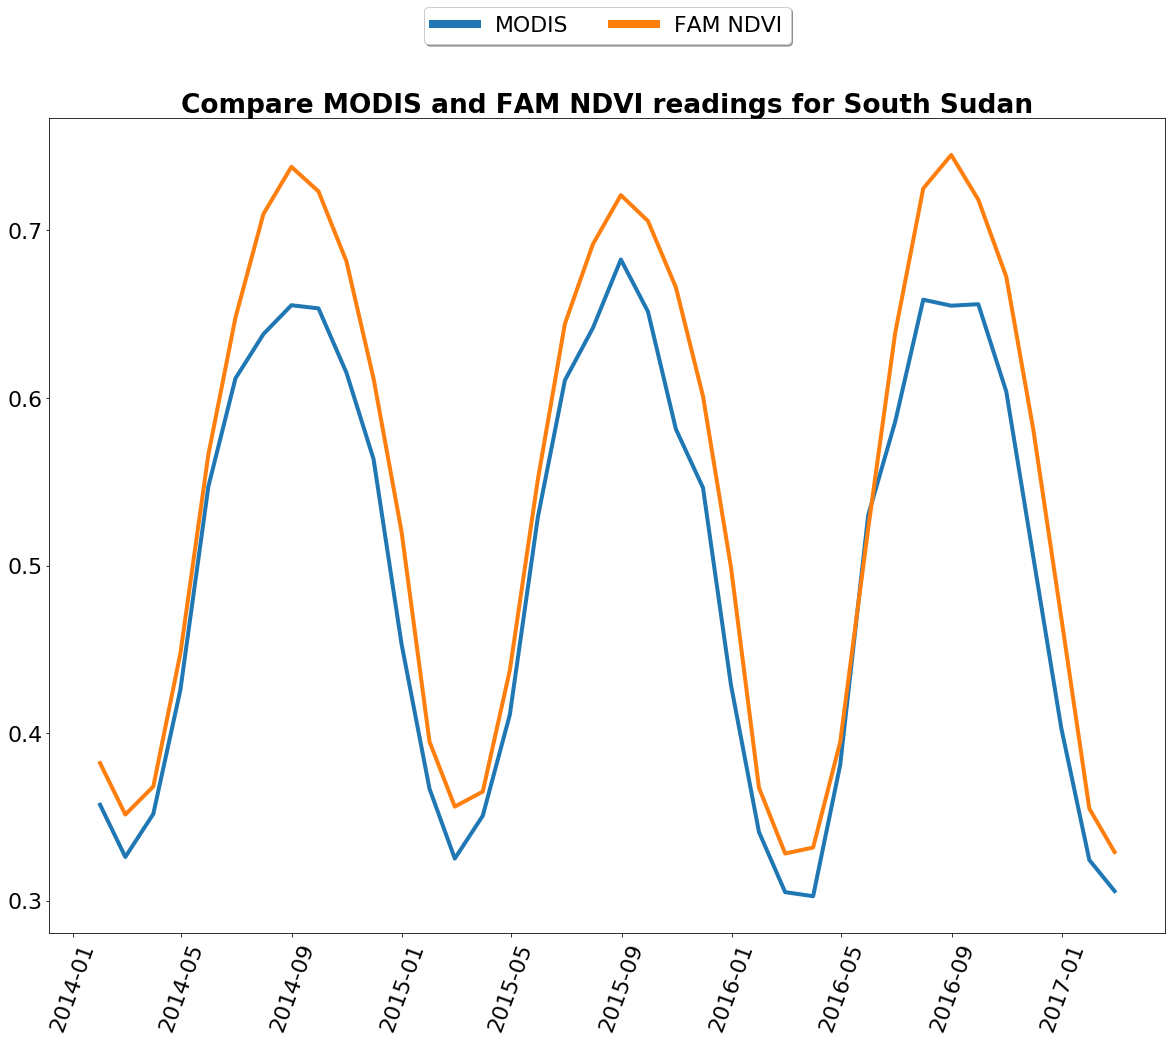

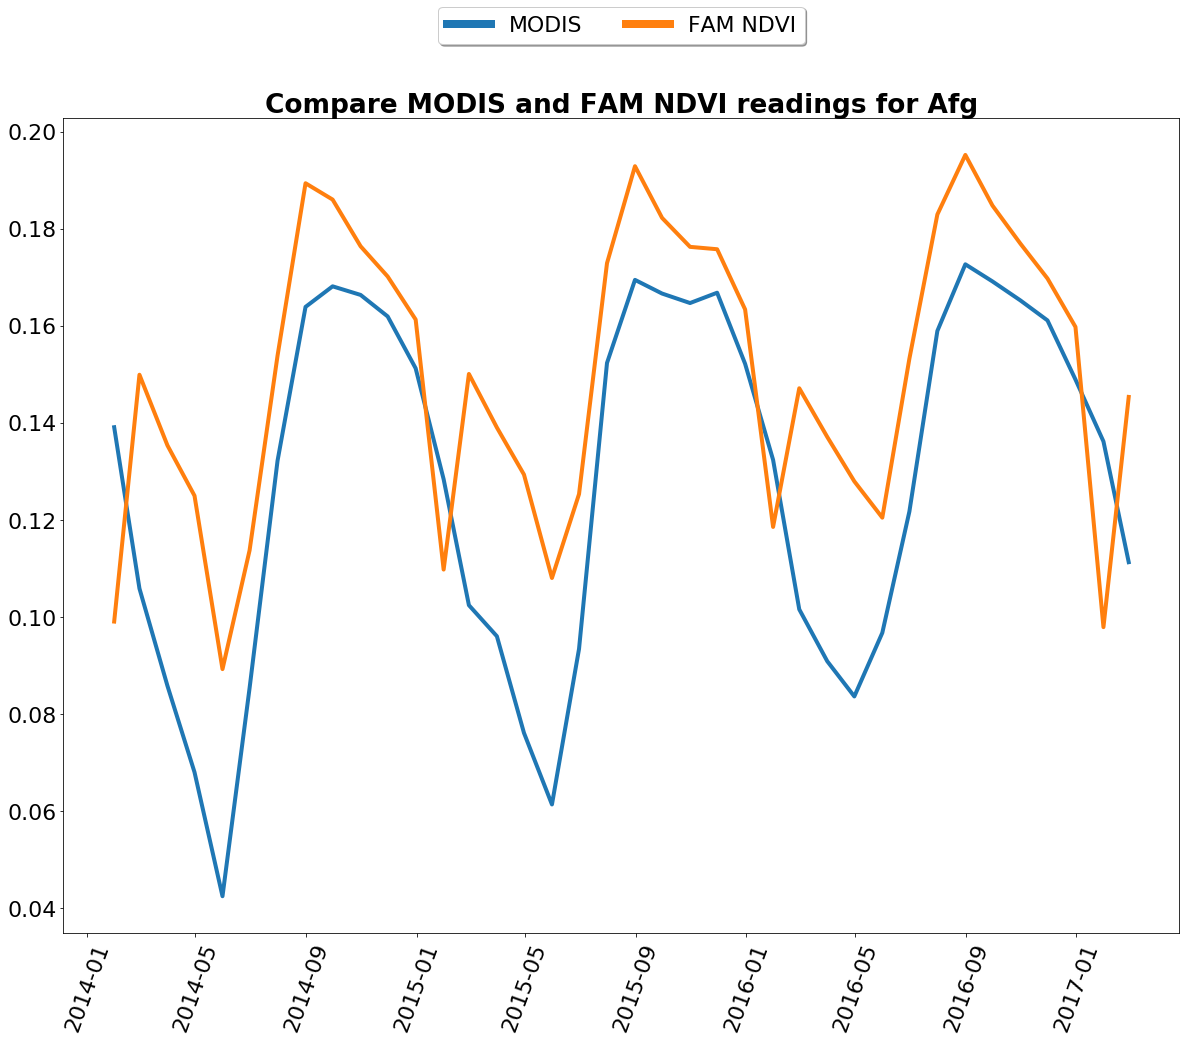

In [13]:
# compare NDVI from Artemis data and Modis data 
print('Run NDVI comparisons between FAM data set and Data set pulled from MODIS\n')
compare_frames(somalia_bframe, somalia_df3,datetime.date(2012, 1, 1), datetime.date(2017, 3, 1), 'Somalia')
compare_frames(mali_bframe, mali_df3,datetime.date(2014, 1, 1), datetime.date(2017, 3, 1), 'Mali')
compare_frames(niger_bframe, niger_df3,datetime.date(2014, 1, 1), datetime.date(2017, 3, 1), 'Niger')
compare_frames(southsudan_bframe, southsudan_df3,datetime.date(2014, 1, 1), datetime.date(2017, 3, 1), 'South Sudan')
compare_frames(afg_bframe, afg_df3,datetime.date(2014, 1, 1), datetime.date(2017, 3, 1), 'Afg')



In [14]:
# Need some kind of dictionary for seasons  as a part of the inputs for generating model feature and label data
mali_seasons = {'Interior Delta and Lacustral Zone':['04'],
                'Sahelian zone':['07', '09'],
                'Sudanese zone':['11'],
                'Sudano-guinean zone': ['07', '09']
}

somalia_seasons = {'Bay and Bakool':['01', '07']
}

niger_seasons = {'Sahel':['04', '10']
}

southsudan_seasons = {'Equatoria':['01', '08']
}

afg_seasons = {'Cereal':['06', '10']
}

In [15]:
# displays functionality of the label/feature divider
# however this runs a bit slowly, so all these dfs are pre-pickled for you 
# this call generates a multi-class classification data set 
"""
label_season_feature_tables(bframe, mframe, seasons, start, binary, regressor)

bframe - artemis data
mframe - modis data
seasons - season dictionary 
start - when you want to start your searches (index errors thrown by niger and south sudan patch)
binary - 0 if you want all 5 classes, other wise a number 1-4, which basically tells function
where it should be splitting the scores. 0 is not critical, 1 is critical. if binary = 2, 
scores of 1, 2 will be labelled as 0 (not critical) and 3, 4, 5 will be given a class of 1 (critical)
** 2 is recommended if doing a binary split ** 

regressor - if true predicts pct population of 3 and above (no way to adjust class break sorry),
would return a number [0, 1) instead of a class for label 


basically makes the df that will feed the feature label pairs that go into the models 
"""
print('Starting sample label feature table split:\n')
afg_label_table, afg_feature_table = label_season_feature_tables(afg_bframe, afg_df3, afg_seasons, datetime.date(2012, 1, 1), 0)
print('Value Counts of Classes for Afghanistan Example\n', afg_label_table.score.value_counts())


Starting sample label feature table split:

Number of regions:  34
Number of samples:  5
2014-09-30 00:00:00


/Users/amberthomas/Downloads/CS325b/famine-intensity-prediction/modis_data/modis_model_util.py:312: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  feature_table = pd.concat([feature_table, cur])


2015-09-30 00:00:00
2016-04-30 00:00:00
2017-08-31 00:00:00
Value Counts of Classes for Afghanistan Example
 2    69
3    61
4     2
1     2
Name: score, dtype: int64


In [16]:

"""somalia_label_table, somalia_feature_table = label_season_feature_tables(somalia_bframe, somalia_df3, somalia_seasons, datetime.date(2012, 1, 1), 0)
#afg_label_table, afg_feature_table = label_season_feature_tables(afg_bframe, afg_df3, afg_seasons, datetime.date(2012, 1, 1), 2, True)
mali_label_table, mali_feature_table = label_season_feature_tables(mali_bframe, mali_df3,mali_seasons, datetime.date(2012, 1, 1), 0)
niger_label_table, niger_feature_table = label_season_feature_tables(niger_bframe, niger_df3, niger_seasons, datetime.date(2010, 1, 1), 0)
southsudan_label_table, southsudan_feature_table = label_season_feature_tables(southsudan_bframe, southsudan_df3,southsudan_seasons, datetime.date(2013, 9, 1), 0)"""


'somalia_label_table, somalia_feature_table = label_season_feature_tables(somalia_bframe, somalia_df3, somalia_seasons, datetime.date(2012, 1, 1), 0)\n#afg_label_table, afg_feature_table = label_season_feature_tables(afg_bframe, afg_df3, afg_seasons, datetime.date(2012, 1, 1), 2, True)\nmali_label_table, mali_feature_table = label_season_feature_tables(mali_bframe, mali_df3,mali_seasons, datetime.date(2012, 1, 1), 0)\nniger_label_table, niger_feature_table = label_season_feature_tables(niger_bframe, niger_df3, niger_seasons, datetime.date(2010, 1, 1), 0)\nsouthsudan_label_table, southsudan_feature_table = label_season_feature_tables(southsudan_bframe, southsudan_df3,southsudan_seasons, datetime.date(2013, 9, 1), 0)'

In [17]:
#Split data SUPER MODEL MULTICLASS
#This only computes the super model, no longer splits up based on country basis 
print('Splitting up Features for Multi-Label Classification Testing')
train_features, train_labels, test_features, test_labels, feature_list = build_super_model_test_train_array('MULT')
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Splitting up Features for Multi-Label Classification Testing
LABEL TYPE: Multiclass
Training Features Shape: (1354, 54)
Training Labels Shape: (1354, 1)
Testing Features Shape: (454, 54)
Testing Labels Shape: (454, 1)


Mode Baseline
train baseline acc:  0.4881831610044313
test baseline acc:  0.5352422907488987
train baseline f1:  0.16401985111662531
test baseline f1:  0.13945480631276902
train baseline f1 weighted:  0.3202869175423614
test baseline f1: weighted 0.3732105499339523
Persistence Baseline:

persistance test acc:  0.5490196078431373
persistance test f1:  0.36787193750739733
persistance test acc:  0.6859852476290832
persistance test f1:  0.5106060204895081
persistance test acc:  0.8085106382978723
persistance test f1:  0.5881524537594901
persistance test acc:  0.5333333333333333
persistance test f1:  0.5935857853162597
persistance test acc:  0.5746753246753247
persistance test f1:  0.3454647106407281


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Overall acc:  0.6553980370774264
Overall f1:  0.5412440708291207
Overall f1 w:  0.654812333659855
accuracy,f1,f1_weighted
0.6553980370774264,0.5412440708291207,0.654812333659855


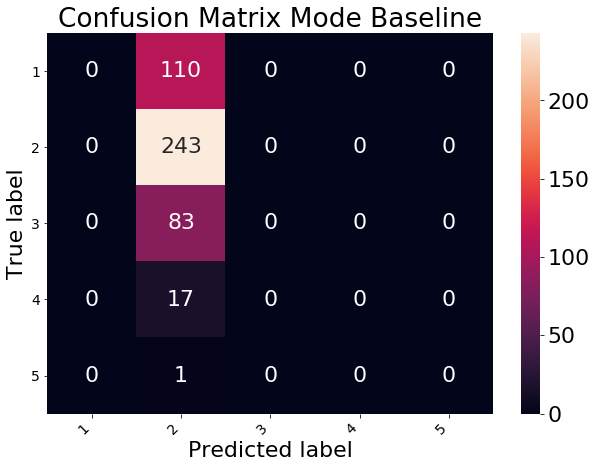

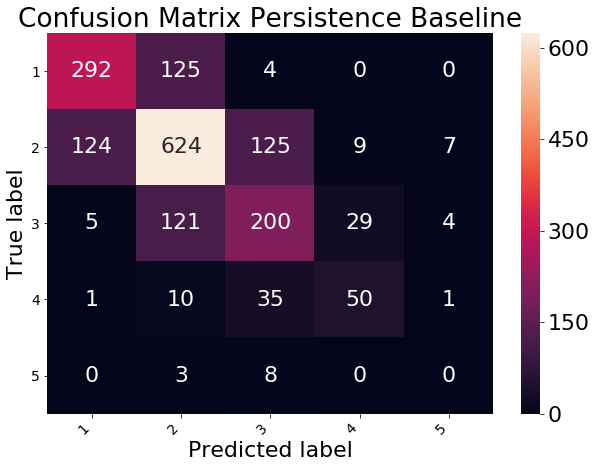

In [18]:
#Multi-label Baselines
print('Mode Baseline')
Mode_Baseline(train_labels, test_labels, (1, 6))
print('Persistence Baseline:\n')
all_country_persistance_wrapper(afg_bframe, somalia_bframe, mali_bframe, niger_bframe, southsudan_bframe, (1, 6))




Hyperparameter Testing for other Multi-Label Classification models skipped for your convenience:


Random Forest Weighted Penalty


/Users/amberthomas/Downloads/CS325b/famine-intensity-prediction/modis_data/modis_model_util.py:787: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(train_features, train_labels.astype(int));
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



train acc:  0.6935007385524372
train f1:  0.5122328709527629
train f1 weighted:  0.6832680772066033

test acc:  0.6497797356828194
test f1:  0.3761803051317614
test f1: weighted 0.634708462915554
Random Forest Weighted Best,F1,F1 Weighted,Accuracy
Random Forest Weighted Train,0.6935007385524372,0.5122328709527629,0.6832680772066033
Random Forest Weighted Test,0.6497797356828194,0.3761803051317614,0.634708462915554

Random Forest Variable importance:
Variable: prev_score           Importance: 0.21
Variable: fG.3_m_back          Importance: 0.07
Variable: fNIR.3_m_back        Importance: 0.05
Variable: fR.3_m_back          Importance: 0.05
Variable: fB.3_m_back          Importance: 0.04
Variable: fR.1_m_back          Importance: 0.04
Variable: fG.1_m_back          Importance: 0.03
Variable: fNLI.2_m_back        Importance: 0.03
Variable: fOSAVI.3_m_back      Importance: 0.03
Variable: month_cos            Importance: 0.03
Variable: month_sin            Importance: 0.03
Variable: fNLI.1_

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarnin


train acc:  0.6418020679468243
train f1:  0.4885228721771452
train f1 weighted:  0.630012641857308

test acc:  0.5947136563876652
test f1:  0.356953831408463
test f1: weighted 0.5828491659490965
Logistic Regression Best,F1,F1 Weighted,Accuracy
Logistic Regression Train,0.6418020679468243,0.4885228721771452,0.630012641857308
Logistic Regression Test,0.5947136563876652,0.356953831408463,0.5828491659490965

Logistic Regression Weighted Penalty


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



train acc:  0.6595273264401772
train f1:  0.5132462103158705
train f1 weighted:  0.6516534903536884

test acc:  0.6189427312775331
test f1:  0.3597826790777153
test f1: weighted 0.6075803138185256
Logistic Regression Weighted Best,F1,F1 Weighted,Accuracy
Logistic Regression Weighted Train,0.6595273264401772,0.5132462103158705,0.6516534903536884
Logistic Regression Weighted Test,0.6189427312775331,0.3597826790777153,0.6075803138185256

Gradient Boosting


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



train acc:  0.8530280649926145
train f1:  0.860474746672509
train f1 weighted:  0.8526046592776007

test acc:  0.6938325991189427
test f1:  0.4289885783832251
test f1: weighted 0.6844208817444741
Gradient Boosting Best,F1,F1 Weighted,Accuracy
Gradient Boosting Train,0.8530280649926145,0.860474746672509,0.8526046592776007
Gradient Boosting Test,0.6938325991189427,0.4289885783832251,0.6844208817444741


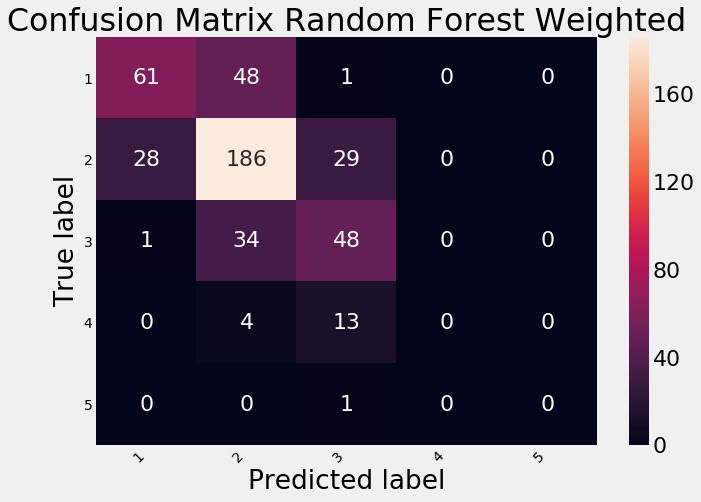

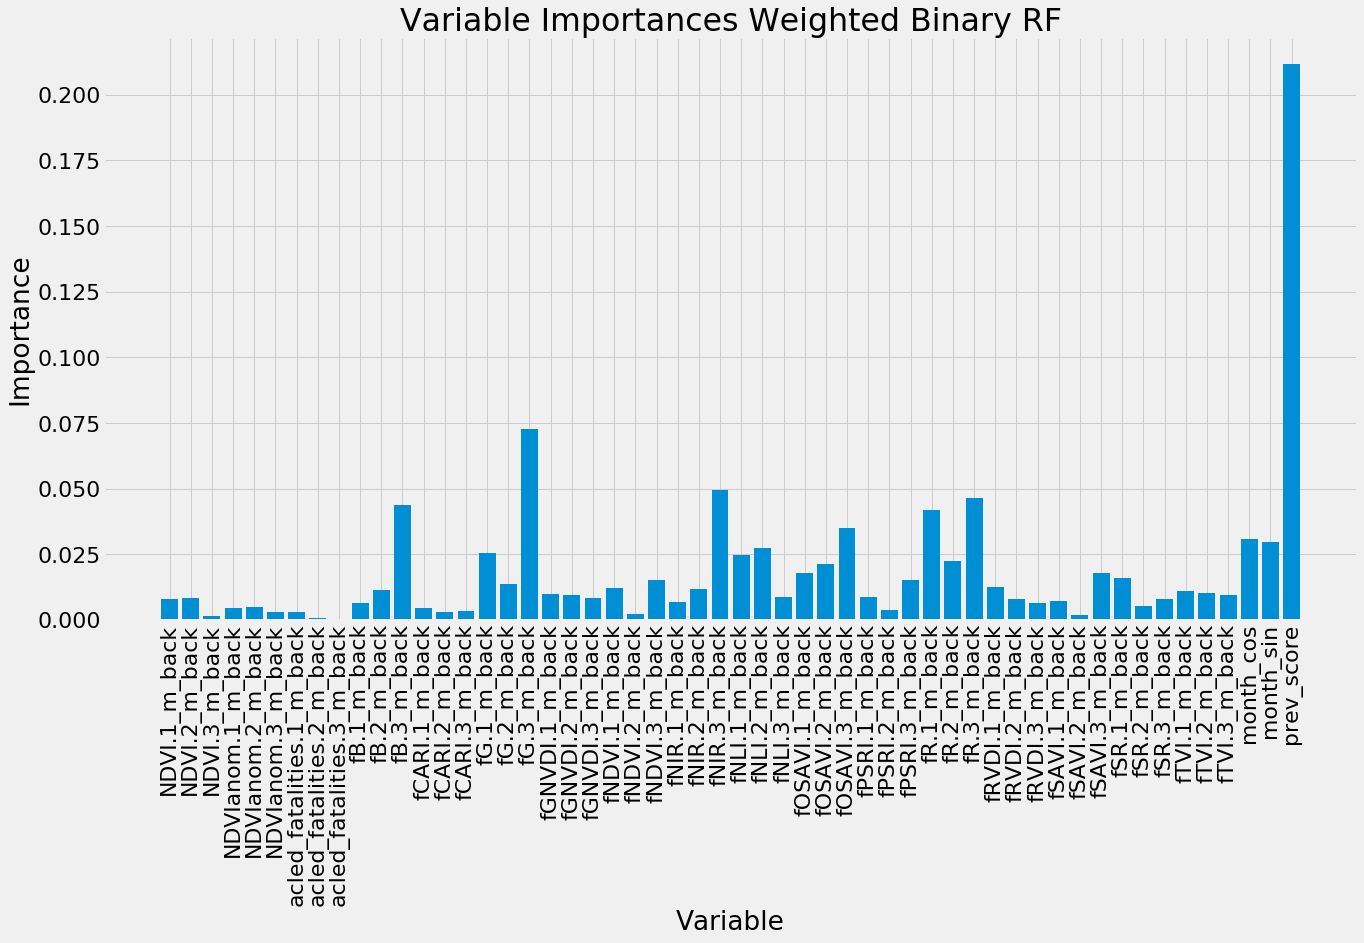

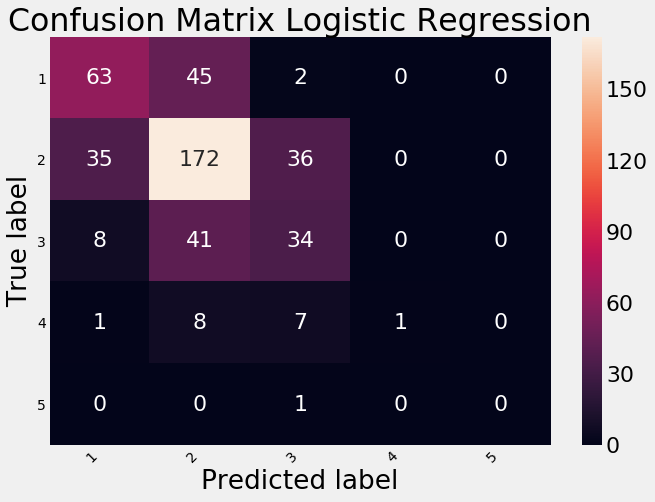

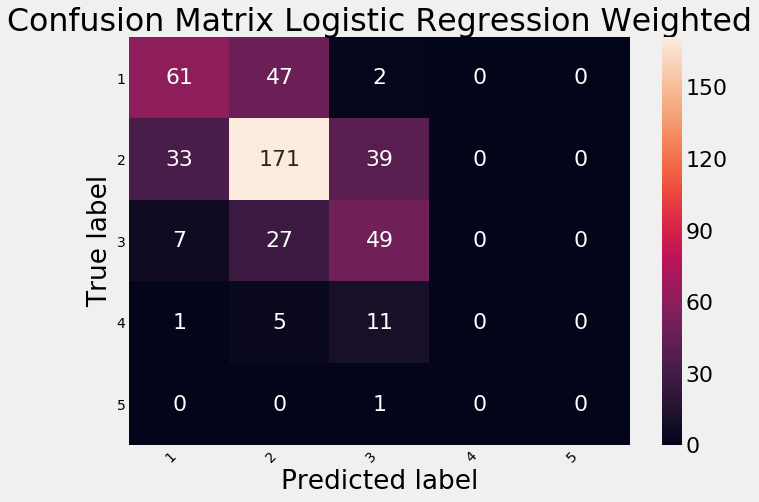

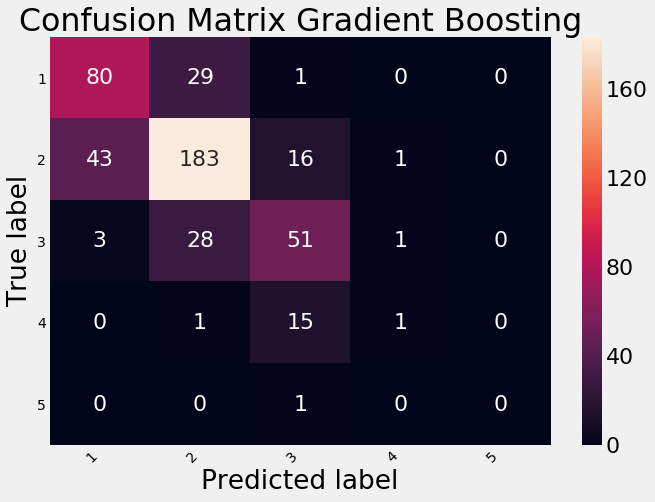

In [20]:
#Multi-class Tests

######Hyper-param testing below######
parameter_candidates_rf = [
    {'n_estimators': [100, 500, 700, 1000, 1200, 1500, 2000], 'max_depth': [2,3,4]}
]
scoring = ['f1_macro','f1_weighted', 'accuracy', 'recall_weighted','recall_macro', 'precision_weighted','precision_macro']
class_weight = None
rf = RandomForestClassifier(class_weight = class_weight, random_state = 42)

print('Example of Cross Validation grid search for optimal Random Forest hyperparameters in progress.')
print('Please be patient, this will take a minute...')
hstable = hyperparam_search(train_features, train_labels, test_features, test_labels, parameter_candidates_rf, scoring, rf)
paramsrf = hstable.params.values[0]
paramsrf['random_state'] = 42
paramsrf['class_weight'] = class_weight

rf = RandomForestClassifier(**paramsrf)
classifier_train_test(rf, train_features, train_labels, test_features, test_labels, (1,6), title = 'Random Forest')
print("\nRandom Forest Variable importance:")
get_RF_variable_importance(rf, feature_list, 'Multi-class RF')

######Hyper-param testing above######

print('Hyperparameter Testing for other Multi-Label Classification models skipped for your convenience:\n')
print("\nRandom Forest Weighted Penalty")
class_weight = {1:1, 2:1, 3:1.5, 4:2}
rf = RandomForestClassifier(n_estimators = 100, max_depth=3, class_weight = class_weight, random_state = 42)
classifier_train_test(rf, train_features, train_labels, test_features, test_labels, (1,6), title = 'Random Forest Weighted')
print("\nRandom Forest Variable importance:")
get_RF_variable_importance(rf, feature_list, 'Weighted Binary RF')

print("\nLogistic Regression")
lr = LogisticRegression(C= .9, random_state = 42)
classifier_train_test(lr, train_features, train_labels, test_features, test_labels, (1,6), title = 'Logistic Regression')
print("\nLogistic Regression Weighted Penalty")
lr = LogisticRegression(C= .65, class_weight = {1:1, 2:1, 3:1.5, 4:2}, random_state = 42)
classifier_train_test(lr, train_features, train_labels, test_features, test_labels, (1,6), title = 'Logistic Regression Weighted')
print("\nGradient Boosting")
gb = GradientBoostingClassifier(n_estimators= 100, subsample =.21, max_depth = 3, max_features = 10, random_state = 42)
classifier_train_test(gb, train_features, train_labels, test_features, test_labels, (1,6), title = 'Gradient Boosting')


In [21]:
#Split data SUPER MODEL
#This only computes the super model, no longer splits up based on country basis 
print('Splitting up Features for Binary Testing')
train_features, train_labels, test_features, test_labels, feature_list = build_super_model_test_train_array('BIN')
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Splitting up Features for Binary Testing
LABEL TYPE: Binary
Training Features Shape: (1354, 54)
Training Labels Shape: (1354, 1)
Testing Features Shape: (454, 54)
Testing Labels Shape: (454, 1)


Mode Baseline
train baseline acc:  0.774741506646972
test baseline acc:  0.7775330396475771
train baseline f1:  0.43653766125676235
test baseline f1:  0.43742255266418834
train baseline f1 weighted:  0.6764076907804191
test baseline f1: weighted 0.6802209739667774
Persistence Baseline:

persistance test acc:  0.6372549019607843
persistance test f1:  0.6099224806201551


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


persistance test acc:  0.8587987355110642
persistance test f1:  0.8066069299462248
persistance test acc:  0.9276595744680851
persistance test f1:  0.7064442648247483
persistance test acc:  0.9416666666666667
persistance test f1:  0.7345132743362832
persistance test acc:  0.724025974025974
persistance test f1:  0.7185400204268129
Overall acc:  0.8435114503816794
Overall f1:  0.7948807278885877
Overall f1 w:  0.8432391619018749
accuracy,f1,f1_weighted
0.8435114503816794,0.7948807278885877,0.8432391619018749


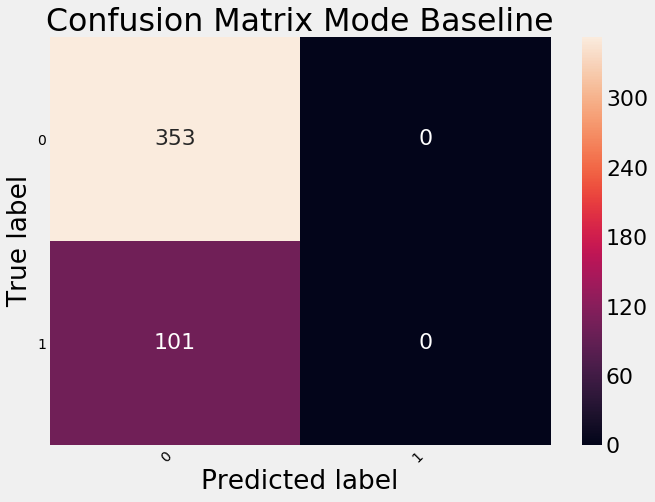

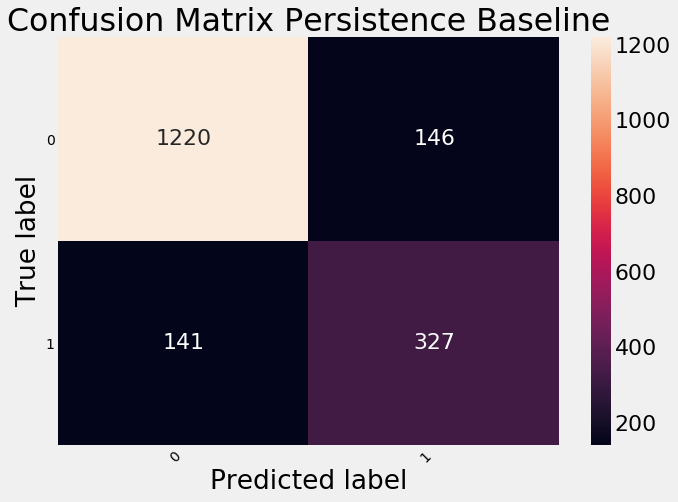

In [22]:
#Binary Baselines
print('Mode Baseline')
Mode_Baseline(train_labels, test_labels, (0, 2))
print('Persistence Baseline:\n')
all_country_persistance_wrapper(afg_bframe, somalia_bframe, mali_bframe, niger_bframe, southsudan_bframe, (0, 2))




Hyperparameter Testing for Binary Classification skipped for your convenience:

Random Forest


/Users/amberthomas/Downloads/CS325b/famine-intensity-prediction/modis_data/modis_model_util.py:787: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(train_features, train_labels.astype(int));



train acc:  0.8870014771048744
train f1:  0.8207921023333307
train f1 weighted:  0.8806460207173264

test acc:  0.8590308370044053
test f1:  0.7724952237777569
test f1: weighted 0.8503772756817404
Random Forest Best,F1,F1 Weighted,Accuracy
Random Forest Train,0.8870014771048744,0.8207921023333307,0.8806460207173264
Random Forest Test,0.8590308370044053,0.7724952237777569,0.8503772756817404

Random Forest Variable importance:
Variable: prev_score           Importance: 0.17
Variable: fNIR.3_m_back        Importance: 0.08
Variable: fG.3_m_back          Importance: 0.07
Variable: fR.3_m_back          Importance: 0.05
Variable: fB.3_m_back          Importance: 0.04
Variable: fOSAVI.3_m_back      Importance: 0.04
Variable: fG.2_m_back          Importance: 0.03
Variable: fGNVDI.3_m_back      Importance: 0.03
Variable: fNIR.2_m_back        Importance: 0.03
Variable: fR.2_m_back          Importance: 0.03
Variable: fB.2_m_back          Importance: 0.02
Variable: fG.1_m_back          Importance:

/Users/amberthomas/Downloads/CS325b/famine-intensity-prediction/modis_data/modis_model_util.py:787: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(train_features, train_labels.astype(int));



train acc:  0.8375184638109305
train f1:  0.7768488553278198
train f1 weighted:  0.8407839668171037

test acc:  0.8105726872246696
test f1:  0.7387871976022264
test f1: weighted 0.8147953630848133
Random Forest Weighted Best,F1,F1 Weighted,Accuracy
Random Forest Weighted Train,0.8375184638109305,0.7768488553278198,0.8407839668171037
Random Forest Weighted Test,0.8105726872246696,0.7387871976022264,0.8147953630848133

Random Forest Variable importance:
Variable: prev_score           Importance: 0.17
Variable: fG.3_m_back          Importance: 0.09
Variable: fNIR.3_m_back        Importance: 0.08
Variable: fR.3_m_back          Importance: 0.07
Variable: fB.3_m_back          Importance: 0.06
Variable: fOSAVI.3_m_back      Importance: 0.05
Variable: fG.2_m_back          Importance: 0.04
Variable: fR.2_m_back          Importance: 0.04
Variable: fB.2_m_back          Importance: 0.03
Variable: fG.1_m_back          Importance: 0.03
Variable: fGNVDI.3_m_back      Importance: 0.03
Variable: fPSRI

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



train acc:  0.8463810930576071
train f1:  0.8039342363215114
train f1 weighted:  0.8540619528479483

test acc:  0.8458149779735683
test f1:  0.800702370500439
test f1: weighted 0.8533337458857566
Logistic Regression Weighted Best,F1,F1 Weighted,Accuracy
Logistic Regression Weighted Train,0.8463810930576071,0.8039342363215114,0.8540619528479483
Logistic Regression Weighted Test,0.8458149779735683,0.800702370500439,0.8533337458857566

Gradient Boosting


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



train acc:  0.983751846381093
train f1:  0.9765599425880693
train f1 weighted:  0.9836943111507488

test acc:  0.8744493392070485
test f1:  0.8080651501553842
test f1: weighted 0.8707198903839212
Gradient Boosting Best,F1,F1 Weighted,Accuracy
Gradient Boosting Train,0.983751846381093,0.9765599425880693,0.9836943111507488
Gradient Boosting Test,0.8744493392070485,0.8080651501553842,0.8707198903839212


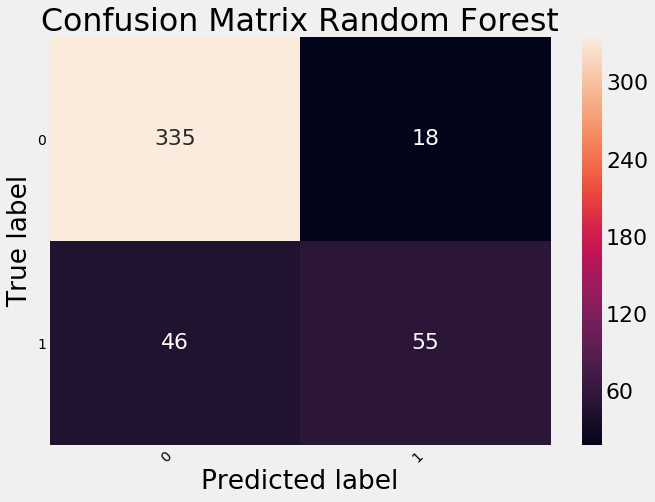

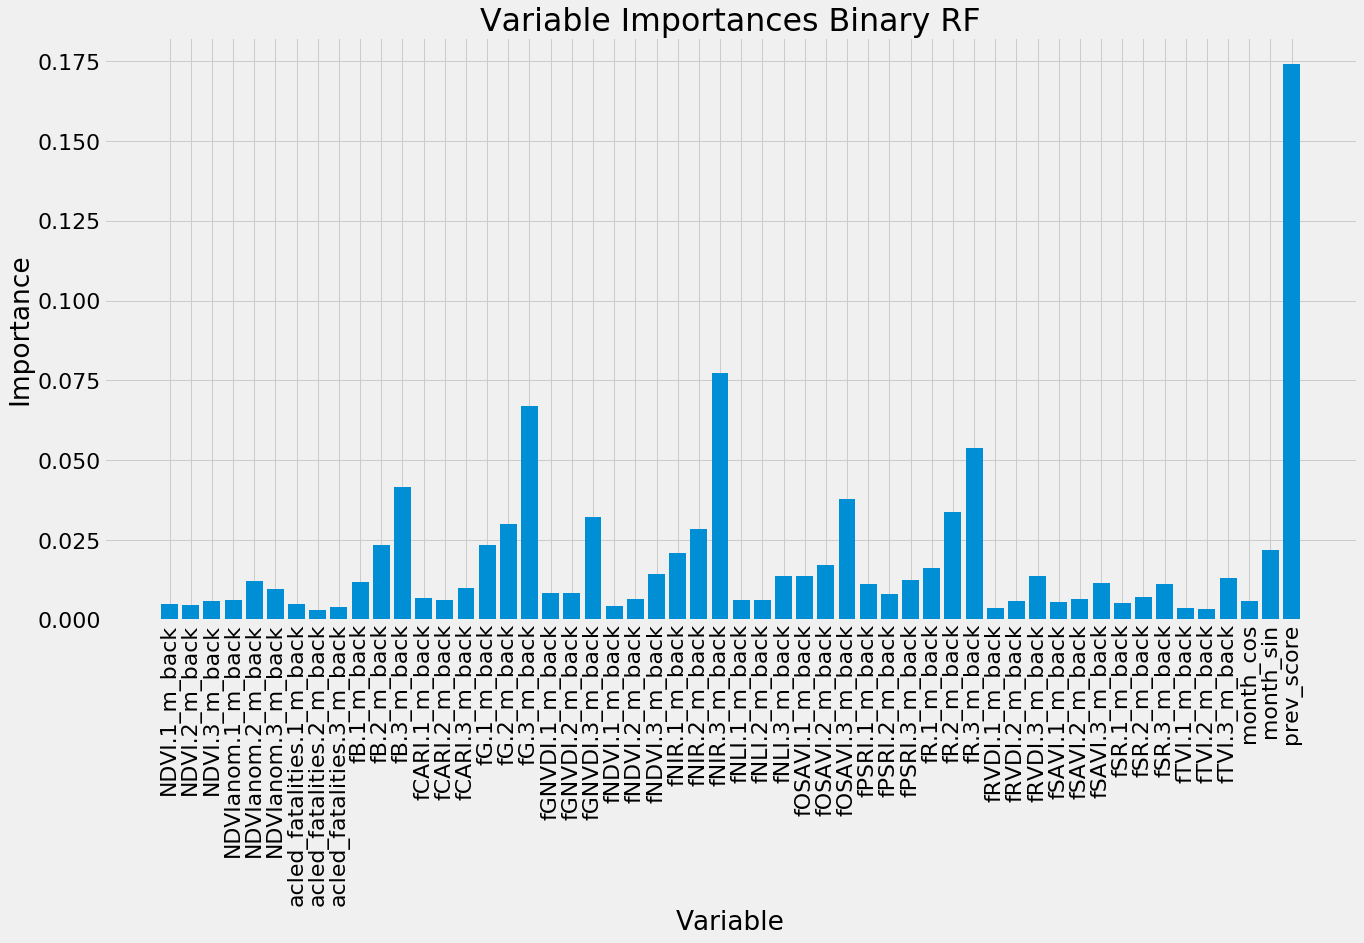

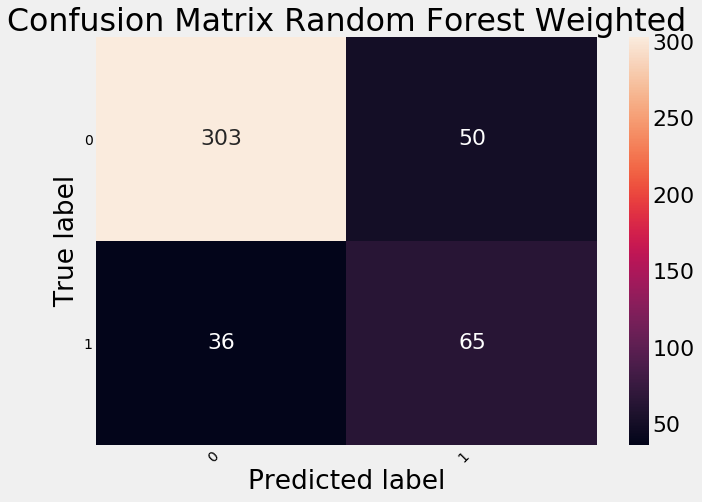

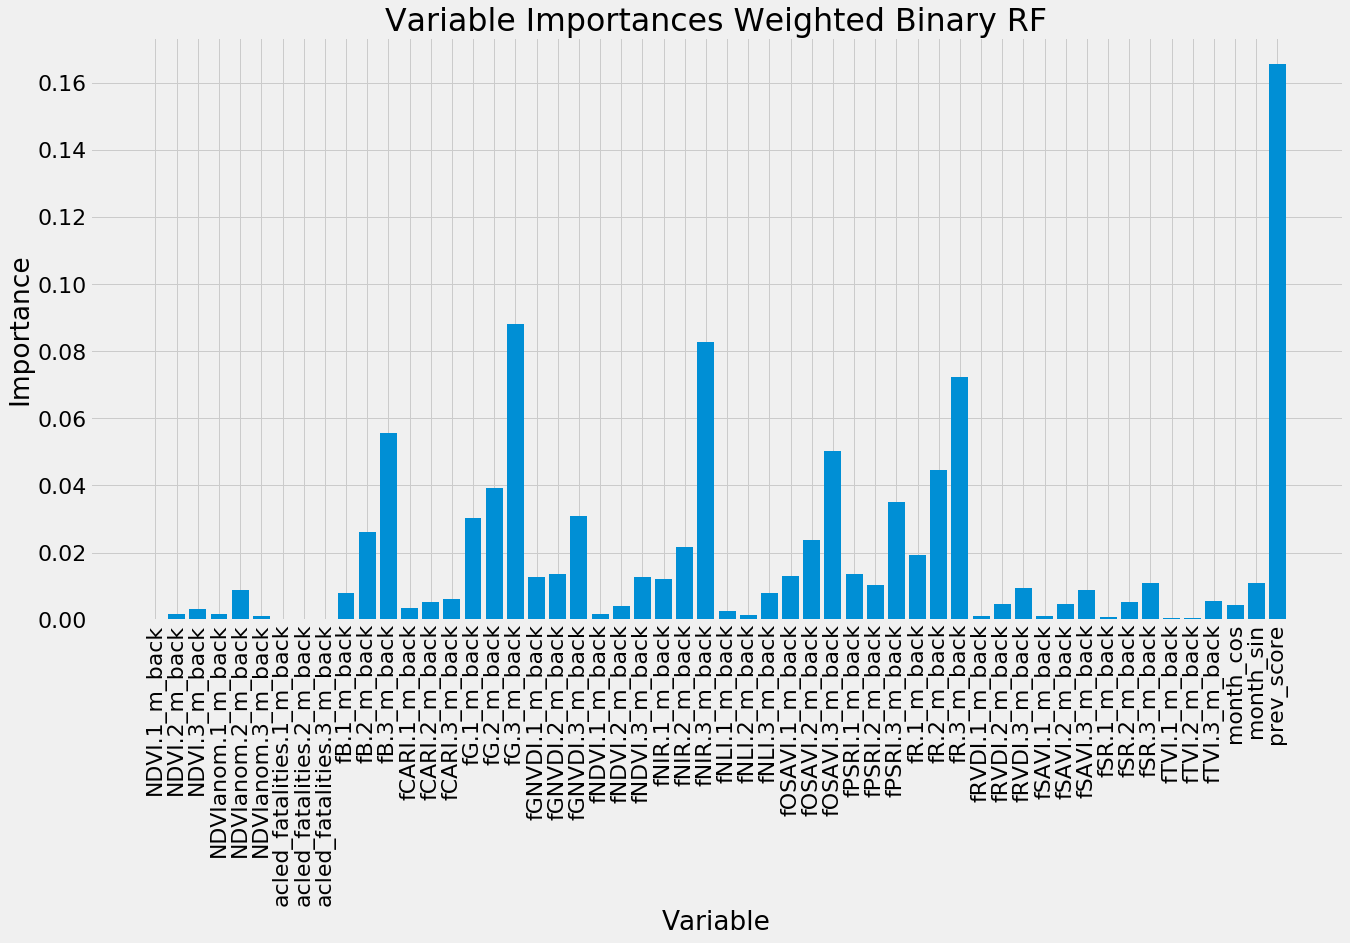

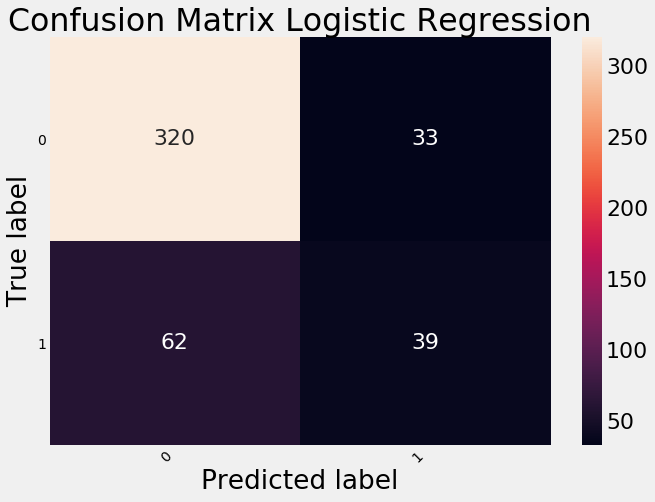

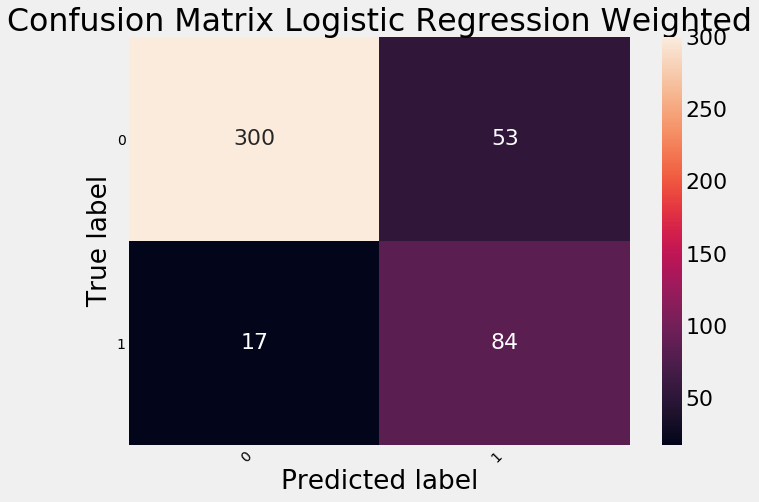

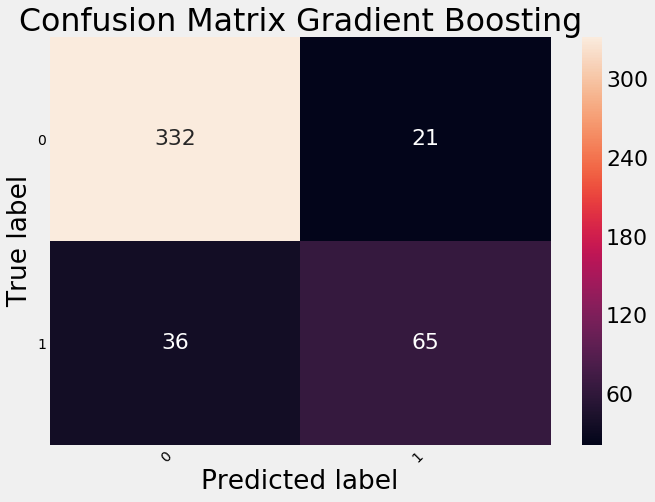

In [23]:
#Binary Tests
print('Hyperparameter Testing for Binary Classification skipped for your convenience:\n')
print("Random Forest")
rf = RandomForestClassifier(n_estimators = 1500, max_depth=4, random_state = 42)
classifier_train_test(rf, train_features, train_labels, test_features, test_labels, (0,2), title = 'Random Forest')
print("\nRandom Forest Variable importance:")
get_RF_variable_importance(rf, feature_list, 'Binary RF')
print("\nRandom Forest Weighted Penalty")
rf = RandomForestClassifier(n_estimators = 1000, max_depth=2, class_weight = 'balanced', random_state = 42)
classifier_train_test(rf, train_features, train_labels, test_features, test_labels, (0,2), title = 'Random Forest Weighted')
print("\nRandom Forest Variable importance:")
get_RF_variable_importance(rf, feature_list, 'Weighted Binary RF')
print("\nLogistic Regression")
lr = LogisticRegression(C= .7, random_state = 42)
classifier_train_test(lr, train_features, train_labels, test_features, test_labels, (0,2), title = 'Logistic Regression')
print("\nLogistic Regression Weighted Penalty")
lr = LogisticRegression(C= .5, class_weight = 'balanced', random_state = 42)
classifier_train_test(lr, train_features, train_labels, test_features, test_labels, (0,2), title = 'Logistic Regression Weighted')
print("\nGradient Boosting")
gb = GradientBoostingClassifier(n_estimators = 500,random_state = 42, subsample = .15, max_depth=3, max_features = 10) 
classifier_train_test(gb, train_features, train_labels, test_features, test_labels, (0,2), title = 'Gradient Boosting')



In [24]:
#Split data SUPER MODEL
#This only computes the super model, no longer splits up based on country basis 
print('Splitting up Features for Regressor Testing (Predicting over Percent Population in crisis).')
train_features, train_labels, test_features, test_labels, feature_list = build_super_model_test_train_array('REG')
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Splitting up Features for Regressor Testing (Predicting over Percent Population in crisis).
LABEL TYPE: Continuous / regressor
Training Features Shape: (1354, 55)
Training Labels Shape: (1354, 1)
Testing Features Shape: (454, 55)
Testing Labels Shape: (454, 1)


Hyperparameter Testing for Percent Population Regressor skipped for your convenience:

Linear Regression Baseline (use the previos percentage to predict current):

Coefficients: 
 [[0.68997422]]
Train Mean squared error: 0.0192
Train Variance score (r2): 0.5229
Test Mean squared error: 0.0191
Test Abd squared error: 0.0932
Test Variance score (r2): 0.4897


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


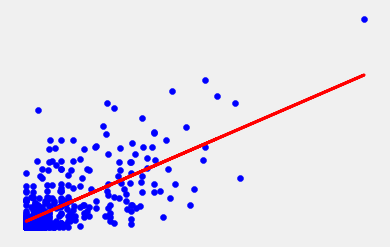

Linear Regression, all features:

Train Mean squared error: 0.0133
Train Absolute error: 0.0750
Train Variance score (r2): 0.6701
Train Explained Variance score (r2): 0.6701
Test Mean squared error: 0.0135
Test Absolute error: 0.0792
Test Variance score (r2): 0.6404
Test Explained Variance score (r2): 0.6405
Linear Regression Best,MSE,MAE,R2,Exp Var
Linear Regression Train,0.013271958189252083,0.07503198593472861,0.6700962791697128,0.6700962791697129
Linear Regression Test,0.013490647110879684,0.0791575391894213,0.6404225060621029,0.6404823163157237
Random Forest


/Users/amberthomas/Downloads/CS325b/famine-intensity-prediction/modis_data/modis_model_util.py:736: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_features, train_labels)


Train Mean squared error: 0.0130
Train Absolute error: 0.0759
Train Variance score (r2): 0.6769
Train Explained Variance score (r2): 0.6769
Test Mean squared error: 0.0147
Test Absolute error: 0.0809
Test Variance score (r2): 0.6087
Test Explained Variance score (r2): 0.6087
Random Forest Best,MSE,MAE,R2,Exp Var
Random Forest Train,0.012999398142909232,0.0758817124842548,0.6768713587891619,0.6768858315644959
Random Forest Test,0.014681339522913358,0.08086737167408758,0.6086859859344171,0.6087180263824232

Random Forest Variable importance:
Variable: prev_score_pct       Importance: 0.75
Variable: fNIR.3_m_back        Importance: 0.06
Variable: fR.3_m_back          Importance: 0.05
Variable: fG.3_m_back          Importance: 0.04
Variable: month_sin            Importance: 0.03
Variable: NDVIanom.1_m_back    Importance: 0.01
Variable: fB.3_m_back          Importance: 0.01
Variable: fGNVDI.3_m_back      Importance: 0.01
Variable: fNIR.2_m_back        Importance: 0.01
Variable: prev_score  

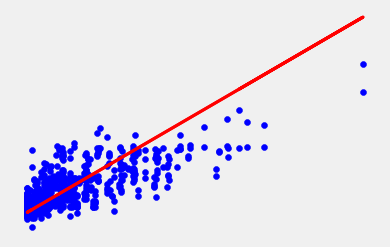

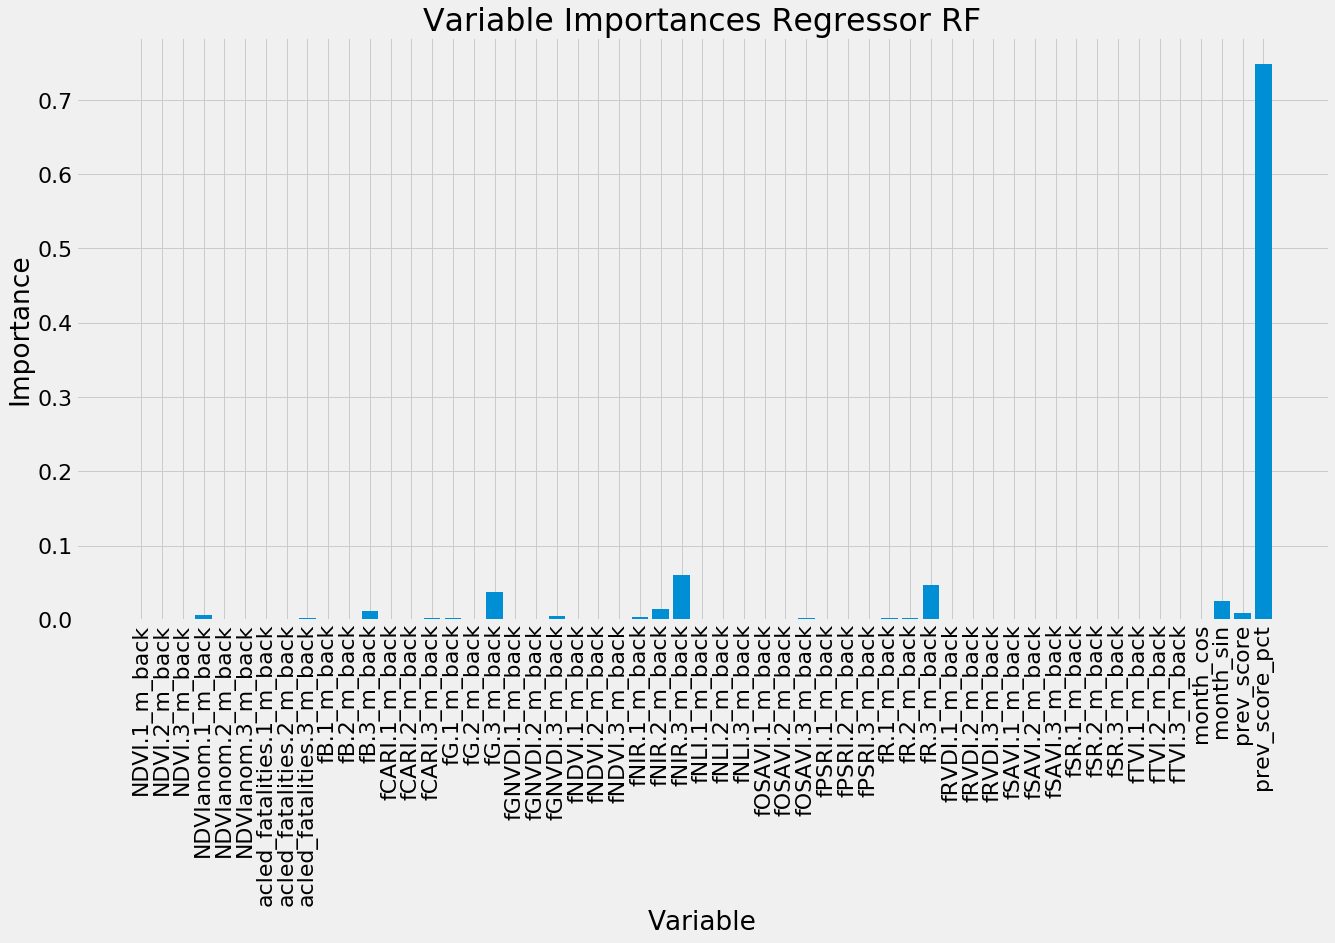

In [25]:
#Regressor Tests
print('Hyperparameter Testing for Percent Population Regressor skipped for your convenience:\n')
print('Linear Regression Baseline (use the previos percentage to predict current):\n')
LinReg_baseline(train_features, train_labels, test_features, test_labels)
print('Linear Regression, all features:\n')
regr = LinearRegression()
regressor_train_test(regr,train_features, train_labels, test_features, test_labels, 'Linear Regression')

print("Random Forest")
rf = RandomForestRegressor(n_estimators = 1500, max_depth=3, random_state = 42)
regressor_train_test(rf, train_features, train_labels, test_features, test_labels, title = 'Random Forest')
print("\nRandom Forest Variable importance:")
get_RF_variable_importance(rf, feature_list, 'Regressor RF')




Gradient Boosting


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Mean squared error: 0.0086
Train Absolute error: 0.0569
Train Variance score (r2): 0.7853
Train Explained Variance score (r2): 0.7861
Test Mean squared error: 0.0140
Test Absolute error: 0.0756
Test Variance score (r2): 0.6258
Test Explained Variance score (r2): 0.6275
Gradient Boosting Best,MSE,MAE,R2,Exp Var
Gradient Boosting Train,0.00863777378963608,0.05688436217816574,0.7852891282313587,0.7860578795638581
Gradient Boosting Test,0.01403933967893143,0.0755739069538478,0.6257977444075427,0.6274531766062381


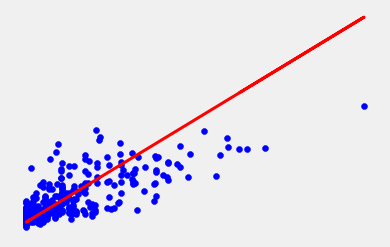

In [26]:
print("\nGradient Boosting")
gb = GradientBoostingRegressor(loss ='huber', n_estimators = 100,random_state = 42, subsample = .21, max_depth=3, max_features = 25) 
regressor_train_test(gb, train_features, train_labels, test_features, test_labels, title = 'Gradient Boosting')
